# Student Admissions
---

* Batch model-based supervised learning system
* Classification task -> Binary Classifier

## Preparing the Data
---

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data.csv", header=None)

In [3]:
data.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [4]:
data.tail()

,0,1,2
95,0.77029,0.70140,0
96,0.73156,0.71782,0
97,0.44556,0.57991,0
98,0.85275,0.85987,0
99,0.51912,0.62359,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
data[2].value_counts()

0    50
1    50
Name: 2, dtype: int64

In [7]:
data.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,0.520591,0.519660,0.500000
std,0.216743,0.234301,0.502519
min,0.008449,-0.063669,0.000000
25%,0.334825,0.343457,0.000000
50%,0.528265,0.556385,0.500000
75%,0.693588,0.710245,1.000000
max,1.000000,1.000000,1.000000


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

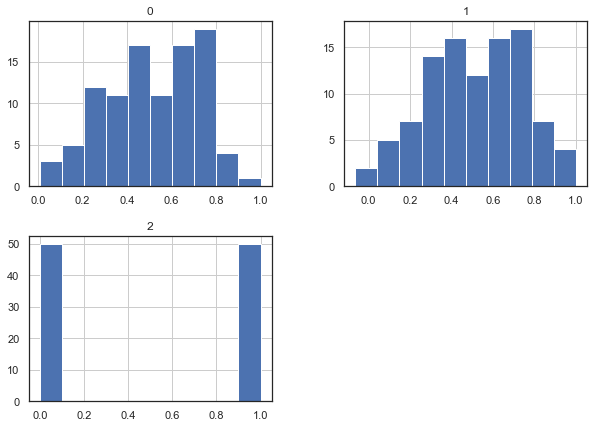

In [9]:
data.hist(figsize=(10, 7))

In [10]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [11]:
X, y = data[[0, 1]], data[2]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [13]:
print(len(X_train), "train +", len(X_test), "test")

80 train + 20 test


In [14]:
print("Train:", y_train.sum(), "accepted +", len(y_train)-y_train.sum(),
      "rejected")
print("Test: ", y_test.sum(), "accepted +", len(y_test)-y_test.sum(),
      "rejected")

Train: 38 accepted + 42 rejected
Test:  12 accepted + 8 rejected


In [15]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [16]:
for train_indices, test_indices in split.split(X, y):
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

In [17]:
print(len(X_train), "train +", len(X_test), "test")

80 train + 20 test


In [18]:
print("Train:", y_train.sum(), "accepted +", len(y_train)-y_train.sum(),
      "rejected")
print("Test: ", y_test.sum(), "accepted +", len(y_test)-y_test.sum(),
      "rejected")

Train: 40 accepted + 40 rejected
Test:  10 accepted + 10 rejected


In [19]:
X_copy, y_copy = X_train.copy(), y_train.copy()

In [20]:
def plot_data(X, y):
    X, y = X.values, y.values
    admitted = X[y==1]
    rejected = X[y==0]
    plt.scatter([s[0] for s in admitted], [s[1] for s in admitted],
                color="green")
    plt.scatter([s[0] for s in rejected], [s[1] for s in rejected],
                color="red")
    plt.xlabel("Test")
    plt.ylabel("Grades")
    plt.title("Student Admissions")
    plt.show()

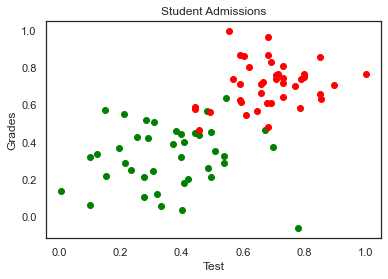

In [21]:
plot_data(X_copy, y_copy)

In [22]:
corr_matrix = X_copy.corr()

In [23]:
corr_matrix[0].sort_values(ascending=False)

0    1.000000
1    0.640985
Name: 0, dtype: float64

In [24]:
import numpy as np

<AxesSubplot:>

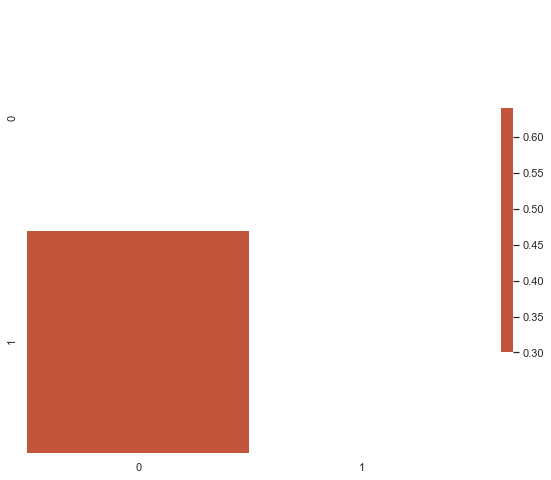

In [25]:
f, ax = plt.subplots(figsize=(10, 9))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

In [26]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>]], dtype=object)

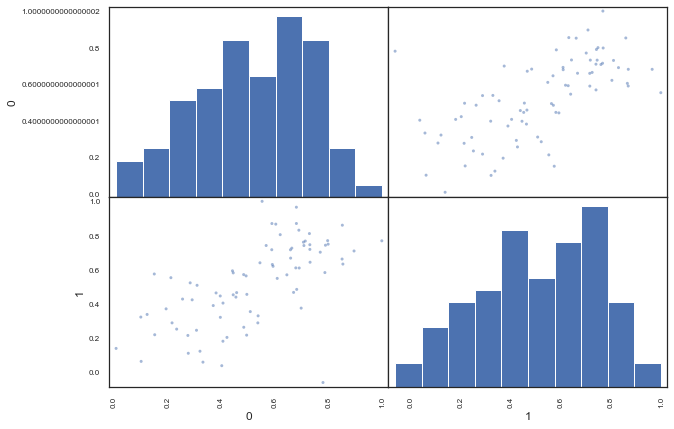

In [27]:
scatter_matrix(X_copy, figsize=(10, 7))

In [68]:
X = X_train.values.astype(np.float32)
y = y_train.values.astype(np.int64)

## Defining the Network Architecture
---

In [69]:
import torch
from torch import nn, optim

In [70]:
class Net(nn.Module):
    
    def __init__(self, num_units_2=10, num_units_3=10, dropout=0):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(2, num_units_2)
        self.fc2 = nn.Linear(num_units_2, num_units_3)
        self.fc3 = nn.Linear(num_units_3, 2)
        
        self.relu = nn.ReLU()
        
        self.drop = nn.Dropout(p=dropout)
        
        self.num_units_2 = num_units_2
        self.num_units_3 = num_units_3
    
    
    def forward(self, x):
        x = self.fc1(x)
        
        if self.num_units_2 > 2:
            x = self.drop(self.relu(x))
            x = self.fc2(x)
            
            if self.num_units_3 > 2:
                x = self.drop(self.relu(x))
                x = self.fc3(x)
        
        return x

In [71]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [72]:
from skorch import NeuralNetClassifier

In [73]:
net = NeuralNetClassifier(
    module=Net,
    device=device,
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.Adam,
    lr=0.01,
    max_epochs=10,
    batch_size=10,
    iterator_train__shuffle=True
)

In [74]:
net.fit(X, y)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7039       0.5000        0.6695  0.0600
      2        0.6638       0.9375        0.6419  0.0101
      3        0.6417       0.9375        0.6127  0.0099
      4        0.6115       0.9375        0.5753  0.0100
      5        0.5740       0.9375        0.5150  0.0101
      6        0.5105       0.9375        0.4475  0.0000
      7        0.4401       0.8750        0.3718  0.0000
      8        0.3645       0.8750        0.2896  0.0101
      9        0.3033       0.8750        0.2320  0.0099
     10        0.2361       0.8750        0.2015  0.0100


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=Net(
    (fc1): Linear(in_features=2, out_features=10, bias=True)
    (fc2): Linear(in_features=10, out_features=10, bias=True)
    (fc3): Linear(in_features=10, out_features=2, bias=True)
    (relu): ReLU()
    (drop): Dropout(p=0, inplace=False)
  ),
)

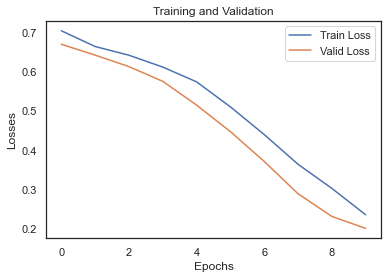

In [75]:
plt.plot(net.history[:, "train_loss"], label="Train Loss")
plt.plot(net.history[:, "valid_loss"], label="Valid Loss")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Training and Validation")
plt.legend()

In [76]:
pred = net.predict(X_test.values.astype(np.float32))
pred

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [77]:
top_p, top_class = torch.from_numpy(net.predict_proba(
    X_test.values.astype(np.float32))).topk(k=1, dim=1)
top_class.flatten().numpy()

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [78]:
y_test.values

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [79]:
np.sum(pred==y_test.values)

18

---

In [80]:
pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
    ("net", net)
])

In [81]:
pipeline.fit(X, y)

Re-initializing module.
Re-initializing optimizer.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6448       0.8750        0.5483  0.0103
      2        0.5145       0.8750        0.4010  0.0031
      3        0.3687       0.8750        0.2741  0.0100
      4        0.2388       0.8750        0.2202  0.0100
      5        0.1607       0.8750        0.2247  0.0095
      6        0.1275       0.8750        0.2437  0.0105
      7        0.1135       0.8750        0.2564  0.0097
      8        0.1116       0.8750        0.2668  0.0103
      9        0.1111       0.8750        0.2742  0.0099
     10        0.1036       0.8750        0.2775  0.0101


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('net',
                 <class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=Net(
    (fc1): Linear(in_features=2, out_features=10, bias=True)
    (fc2): Linear(in_features=10, out_features=10, bias=True)
    (fc3): Linear(in_features=10, out_features=2, bias=True)
    (relu): ReLU()
    (drop): Dropout(p=0, inplace=False)
  ),
))])

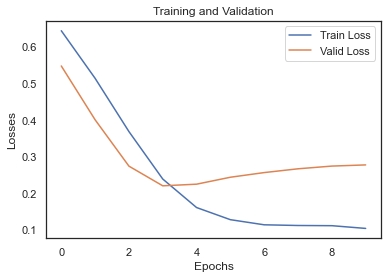

In [82]:
plt.plot(pipeline["net"].history[:, "train_loss"], label="Train Loss")
plt.plot(pipeline["net"].history[:, "valid_loss"], label="Valid Loss")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Training and Validation")
plt.legend()

In [83]:
pred = pipeline.predict(X_test.values.astype(np.float32))
pred

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1],
      dtype=int64)

In [84]:
top_p, top_class = torch.from_numpy(pipeline.predict_proba(
    X_test.values.astype(np.float32))).topk(k=1, dim=1)
top_class.flatten().numpy()

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1],
      dtype=int64)

In [85]:
y_test.values

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [86]:
np.sum(pred==y_test.values)

17

---

In [87]:
X_std_scaled = std_scaler.fit_transform(X)
X_test_std_scaled = std_scaler.transform(X_test).astype(np.float32)

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
net = NeuralNetClassifier(
    module=Net,
    device=device,
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.Adam,
    lr=0.01,
    max_epochs=10,
    batch_size=10,
    iterator_train__shuffle=True
)

In [90]:
net.set_params(train_split=False, verbose=0)

<class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.Net'>,
)

In [91]:
params = {
    "module__num_units_2": [2, 5, 10, 15, 20],
    "module__num_units_3": [2, 5, 10, 15, 20],
    "module__dropout": [0, 0.2, 0.3, 0.5],
    "lr": [1e-3, 3e-3, 5e-3, 0.01],
    "max_epochs": [5, 7, 10, 15, 20, 25]
}

In [92]:
grid = GridSearchCV(net, params, scoring="neg_log_loss", n_jobs=-1,
                    refit=False, cv=4, verbose=1)

In [93]:
grid.fit(X_std_scaled, y)

Fitting 4 folds for each of 2400 candidates, totalling 9600 fits


C:\Users\alesteiner\.conda\envs\krenhof\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [-0.6795565  -0.53759297 -0.7704547  ...         nan         nan
         nan]
  category=UserWarning


GridSearchCV(cv=4,
             estimator=<class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=<class '__main__.Net'>,
),
             n_jobs=-1,
             param_grid={'lr': [0.001, 0.003, 0.005, 0.01],
                         'max_epochs': [5, 7, 10, 15, 20, 25],
                         'module__dropout': [0, 0.2, 0.3, 0.5],
                         'module__num_units_2': [2, 5, 10, 15, 20],
                         'module__num_units_3': [2, 5, 10, 15, 20]},
             refit=False, scoring='neg_log_loss', verbose=1)

In [94]:
print(f"Best Score: {grid.best_score_} \t Best Parameters: {grid.best_params_}")

Best Score: -0.14445051588054983 	 Best Parameters: {'lr': 0.01, 'max_epochs': 7, 'module__dropout': 0.3, 'module__num_units_2': 10, 'module__num_units_3': 20}


In [95]:
net = NeuralNetClassifier(
    module=Net(num_units_2=10, num_units_3=20, dropout=0.3),
    device=device,
    criterion=nn.CrossEntropyLoss,
    optimizer=optim.Adam,
    lr=0.01,
    max_epochs=7,
    batch_size=10,
    iterator_train__shuffle=True
)

In [96]:
net.fit(X_std_scaled, y)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.6294       0.9375        0.4944  0.0095
      2        0.4646       0.8750        0.3050  0.0102
      3        0.2765       0.8750        0.1964  0.0050
      4        0.1937       0.8750        0.1799  0.0097
      5        0.1741       0.8750        0.1954  0.0103
      6        0.1991       0.8750        0.2143  0.0097
      7        0.2090       0.8750        0.2310  0.0104


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=Net(
    (fc1): Linear(in_features=2, out_features=10, bias=True)
    (fc2): Linear(in_features=10, out_features=20, bias=True)
    (fc3): Linear(in_features=20, out_features=2, bias=True)
    (relu): ReLU()
    (drop): Dropout(p=0.3, inplace=False)
  ),
)

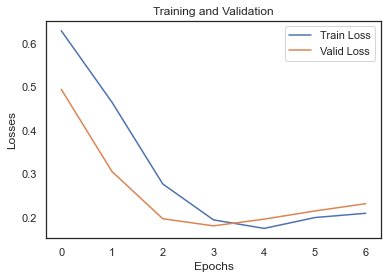

In [97]:
plt.plot(net.history[:, "train_loss"], label="Train Loss")
plt.plot(net.history[:, "valid_loss"], label="Valid Loss")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Training and Validation")
plt.legend()

In [98]:
pred = net.predict(X_test_std_scaled)

In [99]:
np.sum(pred==y_test.values)

17

## Training and Validating the Model
---

In [100]:
X_std_scaled = torch.from_numpy(X_std_scaled)
X_test_std_scaled = torch.from_numpy(X_test_std_scaled)

In [101]:
y = torch.from_numpy(y)
y_test = torch.from_numpy(y_test.values.astype(np.int64))

In [102]:
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [103]:
class Student_Dataset(Dataset):
    
    def __init__(self, X, y):
        super(Student_Dataset, self).__init__()
        
        self.X = X
        self.y = y
    
    
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
    
    def __len__(self):
        return len(self.X)

In [104]:
train_set = Student_Dataset(X_std_scaled, y)
test_set = Student_Dataset(X_test_std_scaled, y_test)

In [105]:
valid_size = 0.2

split = StratifiedShuffleSplit(n_splits=1, test_size=valid_size,
                               random_state=42)
for train_indices, valid_indices in split.split(X_std_scaled, y):
    train_sampler = SubsetRandomSampler(train_indices)
    valid_sampler = SubsetRandomSampler(valid_indices)

In [106]:
train_loader = DataLoader(train_set, batch_size=10, sampler=train_sampler,
                          num_workers=0)
valid_loader = DataLoader(train_set, batch_size=10, sampler=valid_sampler,
                          num_workers=0)

---

In [107]:
from collections import OrderedDict

In [108]:
class Net(nn.Module):
    
    def __init__(self, num_units_2=10, num_units_3=10, dropout=0):
        super(Net, self).__init__()
        
        self.layer1 = nn.Sequential(OrderedDict([
            ("fc1", nn.Linear(2, num_units_2)),
            ("relu1", nn.ReLU()),
            ("drop1", nn.Dropout(p=dropout))
        ]))
        
        self.layer2 = nn.Sequential(OrderedDict([
            ("fc2", nn.Linear(num_units_2, num_units_3)),
            ("relu2", nn.ReLU()),
            ("drop2", nn.Dropout(p=dropout))
        ]))
        
        self.layer3 = nn.Sequential(OrderedDict([
            ("fc3", nn.Linear(num_units_3, 2)) #,
            #("softmax", nn.Softmax(dim=1))
        ]))
    
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        
        return x

In [109]:
net = Net(num_units_2=10, num_units_3=20, dropout=0.3)

In [110]:
net = net.to(device)

In [111]:
criterion = nn.CrossEntropyLoss()

In [112]:
optimizer = optim.Adam(net.parameters(), lr=0.01)

---

Epoch 0: 	 Training Loss: 0.7215307354927063 	 Validation Loss: 0.6315940022468567
     Validation Loss decreased (inf --> 0.631594). Saving model ...
Epoch 1: 	 Training Loss: 0.5857553439480918 	 Validation Loss: 0.4839663654565811
     Validation Loss decreased (0.631594 --> 0.483966). Saving model ...
Epoch 2: 	 Training Loss: 0.47582595688956125 	 Validation Loss: 0.36195944249629974
     Validation Loss decreased (0.483966 --> 0.361959). Saving model ...
Epoch 3: 	 Training Loss: 0.3936793782881328 	 Validation Loss: 0.2172183096408844
     Validation Loss decreased (0.361959 --> 0.217218). Saving model ...
Epoch 4: 	 Training Loss: 0.22942982401166642 	 Validation Loss: 0.16547419130802155
     Validation Loss decreased (0.217218 --> 0.165474). Saving model ...
Epoch 5: 	 Training Loss: 0.2328956052660942 	 Validation Loss: 0.17201056331396103
Epoch 6: 	 Training Loss: 0.21613001929862158 	 Validation Loss: 0.1351870819926262
     Validation Loss decreased (0.165474 --> 0.135187

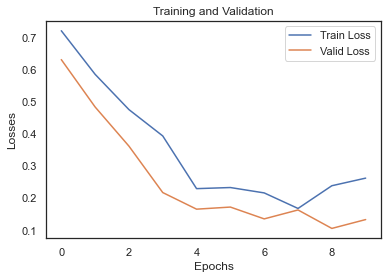

In [113]:
epochs = 10

train_losses, valid_losses = [], []
valid_loss_min = np.Inf
for epoch in range(epochs):
    
    train_loss, valid_loss = 0.0, 0.0
    
    
    ######################
    # Training the Model #
    ######################
    
    net.train()
    
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        
        scores = net(X)
        loss = criterion(scores, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    else:
        train_loss /= len(train_loader)
        train_losses.append(train_loss)
    
    
    ########################
    # Validating the Model #
    ########################
    
    net.eval()
    with torch.no_grad():
        
        for X, y in valid_loader:
            X, y = X.to(device), y.to(device)
            
            scores = net(X)
            loss = criterion(scores, y)
            
            valid_loss += loss.item()
        
        else:
            valid_loss /= len(valid_loader)
            valid_losses.append(valid_loss)
    
    
    print(f"Epoch {epoch}: \t Training Loss: {train_loss} \t Validation Loss: {valid_loss}")
    
    if valid_loss < valid_loss_min:
        print(f"     Validation Loss decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model ...")
        torch.save(net.state_dict(), "net.pth")
        valid_loss_min = valid_loss


else:
    plt.plot(train_losses, label="Train Loss")
    plt.plot(valid_losses, label="Valid Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Losses")
    plt.title("Training and Validation")
    plt.legend()

## Testing the Model (Inference)
---

In [114]:
test_loader = DataLoader(test_set, batch_size=10)

---

In [115]:
net = Net(num_units_2=10, num_units_3=20, dropout=0.3)

In [116]:
net.load_state_dict(torch.load("net.pth"))

<All keys matched successfully>

In [117]:
net

Net(
  (layer1): Sequential(
    (fc1): Linear(in_features=2, out_features=10, bias=True)
    (relu1): ReLU()
    (drop1): Dropout(p=0.3, inplace=False)
  )
  (layer2): Sequential(
    (fc2): Linear(in_features=10, out_features=20, bias=True)
    (relu2): ReLU()
    (drop2): Dropout(p=0.3, inplace=False)
  )
  (layer3): Sequential(
    (fc3): Linear(in_features=20, out_features=2, bias=True)
  )
)

In [118]:
net.layer3.add_module("softmax", nn.Softmax(dim=1))

In [119]:
net

Net(
  (layer1): Sequential(
    (fc1): Linear(in_features=2, out_features=10, bias=True)
    (relu1): ReLU()
    (drop1): Dropout(p=0.3, inplace=False)
  )
  (layer2): Sequential(
    (fc2): Linear(in_features=10, out_features=20, bias=True)
    (relu2): ReLU()
    (drop2): Dropout(p=0.3, inplace=False)
  )
  (layer3): Sequential(
    (fc3): Linear(in_features=20, out_features=2, bias=True)
    (softmax): Softmax(dim=1)
  )
)

In [120]:
net = net.to(device)

---

In [121]:
pred, labels = [], []

#####################
# Testing the Model #
#####################

net.eval()
with torch.no_grad():
    
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        
        logits = net(X)
        top_p, top_class = logits.topk(k=1, dim=1)
        
        pred.append(top_class.flatten())
        labels.append(y)


pred = torch.cat(pred)
labels = torch.cat(labels)

print(pred)
print(labels)

tensor([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])
tensor([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])


In [122]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [123]:
confusion_matrix(labels, pred)

array([[10,  0],
       [ 0, 10]], dtype=int64)

In [124]:
precision_score(labels, pred)

1.0

In [125]:
recall_score(labels, pred)

1.0

In [126]:
f1_score(labels, pred)

1.0

In [127]:
conf_matrix = confusion_matrix(labels, pred)
conf_matrix

array([[10,  0],
       [ 0, 10]], dtype=int64)

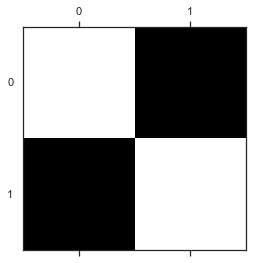

In [128]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)

In [129]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
row_sums

array([[10],
       [10]], dtype=int64)

In [130]:
norm_conf_matrix = conf_matrix / row_sums
norm_conf_matrix

array([[1., 0.],
       [0., 1.]])

In [131]:
np.fill_diagonal(norm_conf_matrix, 0)

In [132]:
norm_conf_matrix

array([[0., 0.],
       [0., 0.]])

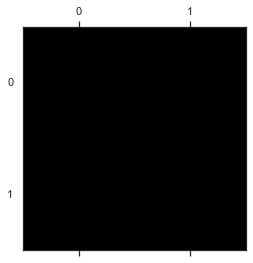

In [133]:
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)

---
---
---

In [28]:
d = {"a": range(1, 6), "b": list(range(1, 4))+[np.nan, np.nan],
     "c": ["A", "B", "C", "B", "A"]}
d

{'a': range(1, 6), 'b': [1, 2, 3, nan, nan], 'c': ['A', 'B', 'C', 'B', 'A']}

In [29]:
df = pd.DataFrame(d)
df

,a,b,c
0,1,1.0,A
1,2,2.0,B
2,3,3.0,C
3,4,NaN,B
4,5,NaN,A


In [30]:
df_copy = df.copy()

In [31]:
df.dropna(subset=["b"])

,a,b,c
0,1,1.0,A
1,2,2.0,B
2,3,3.0,C


In [32]:
df.drop("b", axis=1)

,a,c
0,1,A
1,2,B
2,3,C
3,4,B
4,5,A


In [33]:
median = df["b"].median()
df["b"].fillna(median, inplace=True)
df

,a,b,c
0,1,1.0,A
1,2,2.0,B
2,3,3.0,C
3,4,2.0,B
4,5,2.0,A


In [34]:
from sklearn.impute import SimpleImputer

In [35]:
imputer = SimpleImputer(strategy="median")

In [36]:
num = df_copy.drop("c", axis=1)
num

,a,b
0,1,1.0
1,2,2.0
2,3,3.0
3,4,NaN
4,5,NaN


In [37]:
cat = df_copy[["c"]]
cat

,c
0,A
1,B
2,C
3,B
4,A


In [38]:
num_imputed = imputer.fit_transform(num)
num_imputed

array([[1., 1.],
       [2., 2.],
       [3., 3.],
       [4., 2.],
       [5., 2.]])

In [39]:
pd.DataFrame(num_imputed, columns=num.columns, index=num.index)

,a,b
0,1.0,1.0
1,2.0,2.0
2,3.0,3.0
3,4.0,2.0
4,5.0,2.0


In [40]:
num.columns

Index(['a', 'b'], dtype='object')

In [41]:
a_idx, b_idx = [list(num.columns).index(col) for col in ("a", "b")]
a_idx, b_idx

(0, 1)

In [42]:
from sklearn.preprocessing import FunctionTransformer

In [43]:
def add_feature(A):
    a_per_b = A[:, a_idx] / A[:, b_idx]
    
    return np.c_[A, a_per_b]

In [44]:
feature_adder = FunctionTransformer(add_feature)

In [45]:
num_feature_added = feature_adder.fit_transform(num_imputed)
num_feature_added

array([[1. , 1. , 1. ],
       [2. , 2. , 1. ],
       [3. , 3. , 1. ],
       [4. , 2. , 2. ],
       [5. , 2. , 2.5]])

In [46]:
pd.DataFrame(num_feature_added, columns=list(num.columns)+["a_per_b"],
             index=num.index)

,a,b,a_per_b
0,1.0,1.0,1.0
1,2.0,2.0,1.0
2,3.0,3.0,1.0
3,4.0,2.0,2.0
4,5.0,2.0,2.5


In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [48]:
scaler, std_scaler = MinMaxScaler(), StandardScaler()

In [49]:
num_scaled = scaler.fit_transform(num_feature_added)
num_scaled

array([[0.        , 0.        , 0.        ],
       [0.25      , 0.5       , 0.        ],
       [0.5       , 1.        , 0.        ],
       [0.75      , 0.5       , 0.66666667],
       [1.        , 0.5       , 1.        ]])

In [50]:
num_std_scaled = std_scaler.fit_transform(num_feature_added)
num_std_scaled

array([[-1.41421356, -1.58113883, -0.79056942],
       [-0.70710678,  0.        , -0.79056942],
       [ 0.        ,  1.58113883, -0.79056942],
       [ 0.70710678,  0.        ,  0.79056942],
       [ 1.41421356,  0.        ,  1.58113883]])

In [51]:
from sklearn.pipeline import Pipeline

In [52]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("feature_adder", FunctionTransformer(add_feature)),
    ("scaler", MinMaxScaler())
])

In [53]:
num_transformed = num_pipeline.fit_transform(num)
num_transformed

array([[0.        , 0.        , 0.        ],
       [0.25      , 0.5       , 0.        ],
       [0.5       , 1.        , 0.        ],
       [0.75      , 0.5       , 0.66666667],
       [1.        , 0.5       , 1.        ]])

In [54]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [55]:
encoder, encoder_1hot = OrdinalEncoder(), OneHotEncoder()

In [56]:
cat_encoded = encoder.fit_transform(cat)
cat_encoded

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.]])

In [57]:
encoder.categories_

[array(['A', 'B', 'C'], dtype=object)]

In [58]:
cat_1hot_encoded = encoder_1hot.fit_transform(cat)
cat_1hot_encoded

<5x3 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [59]:
cat_1hot_encoded.toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [60]:
encoder_1hot = OneHotEncoder(sparse=False)

In [61]:
cat_1hot_encoded = encoder_1hot.fit_transform(cat)
cat_1hot_encoded

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [62]:
encoder_1hot.categories_

[array(['A', 'B', 'C'], dtype=object)]

In [63]:
from sklearn.compose import ColumnTransformer

In [64]:
num_features, cat_features = list(num.columns), ["c"]

In [65]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(), cat_features)
])

In [66]:
X = full_pipeline.fit_transform(df_copy)
X

array([[0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.25      , 0.5       , 0.        , 0.        , 1.        ,
        0.        ],
       [0.5       , 1.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.75      , 0.5       , 0.66666667, 0.        , 1.        ,
        0.        ],
       [1.        , 0.5       , 1.        , 1.        , 0.        ,
        0.        ]])

In [67]:
X.shape

(5, 6)